In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
file_path = "zomato.csv"
df = pd.read_csv(file_path, encoding='latin-1')

print("Dataset Info:") # Display basic info
df.info()

print("\nFirst 5 rows:")  # Diplay first five row
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch 

In [3]:
df = df.dropna() # handling null values

In [4]:
#Renaming columns for better readability
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [5]:
df = df.drop_duplicates() #dropping Duplicates

In [6]:
print(df)    # checking progress

      restaurant_id           restaurant_name  country_code              city  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           

In [7]:
# Convert relevant columns to appropriate data types

df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')

In [8]:
# Removing zero ratings to improve accuracy

df = df[df['aggregate_rating'] > 0]

In [9]:
# Exploratory Data Analysis


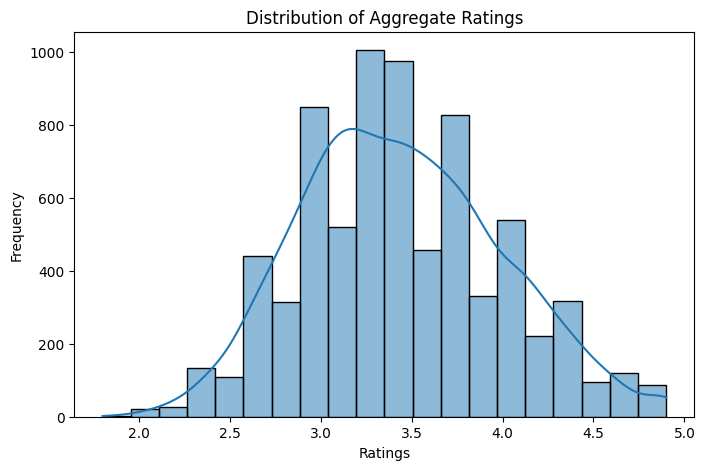

In [10]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-8b101a3b241c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts, y=cuisine_counts.index, palette='viridis')


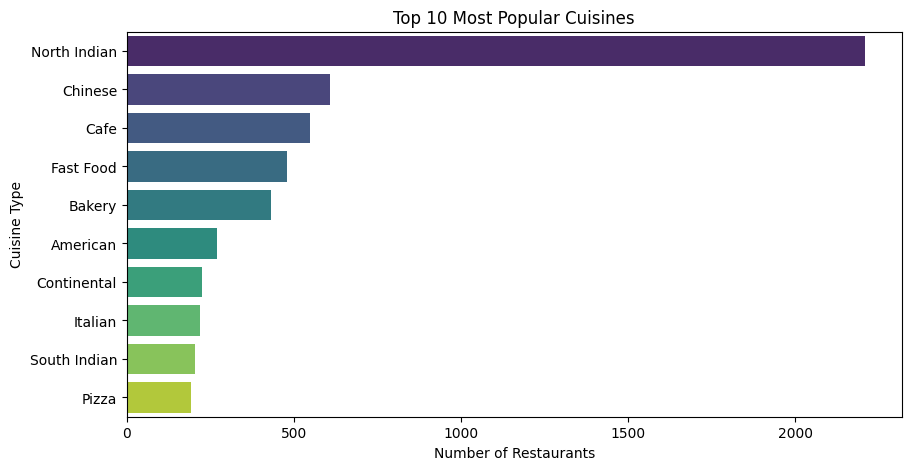

In [11]:
# Most popular cuisines
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: x.split(',')[0])  # Taking first cuisine type only
plt.figure(figsize=(10, 5))
cuisine_counts = df['cuisines'].value_counts().head(10)
sns.barplot(x=cuisine_counts, y=cuisine_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()

<ipython-input-12-d4d2b85fa158>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='coolwarm')


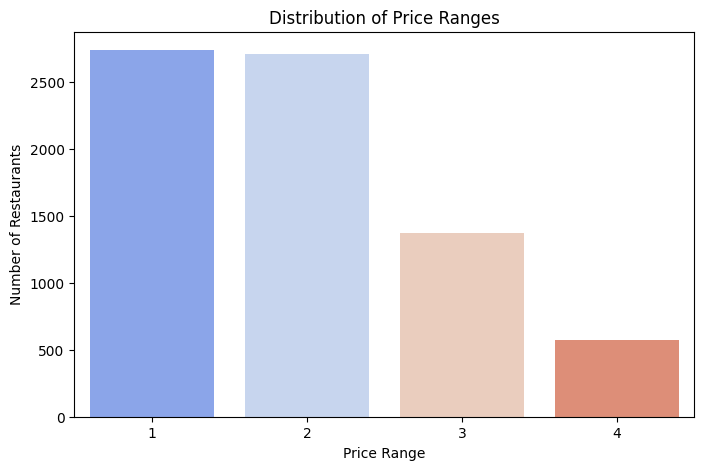

In [12]:
# Price range distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=df, palette='coolwarm')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

<ipython-input-13-8b366c224b5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='pastel')


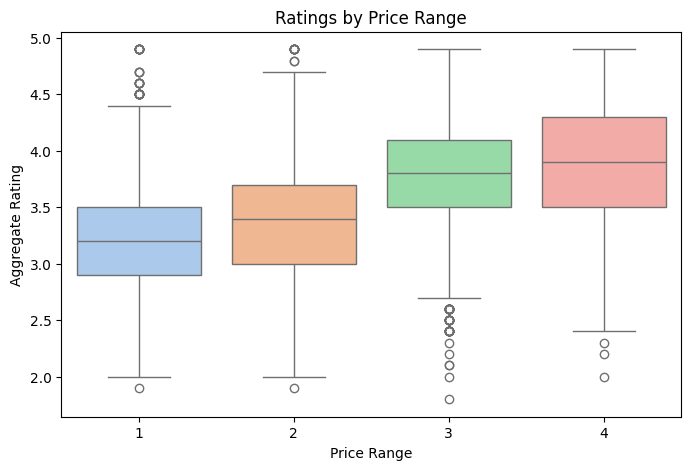

In [13]:
# Average rating by price range
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='pastel')
plt.title('Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

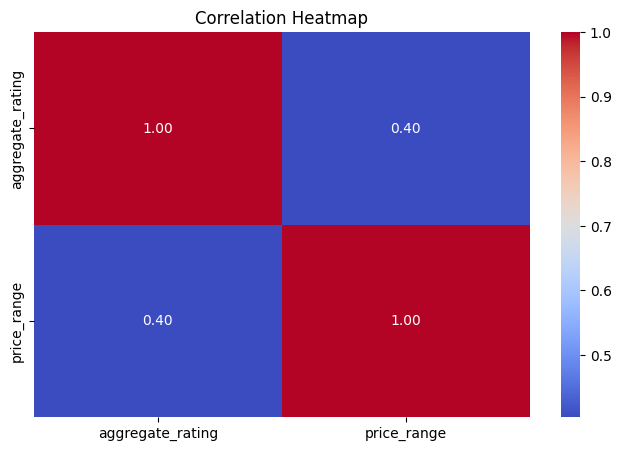

In [14]:
# Correlation heatmap for better insights
plt.figure(figsize=(8, 5))
sns.heatmap(df[['aggregate_rating', 'price_range']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
print("Analysis completed with improved accuracy for this Dataset")


Analysis completed with improved accuracy.
